In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [2]:
url = "/content/trainstati.csv"

tanggal = ["time_estimated", "destination_time"]

origin = pandas.read_table(url, sep=",", parse_dates=tanggal)

origin.iloc[:5, :7]

,id,station_id,train_id,line,route,color,destination
0,AC-2400,AC,2400,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK
1,AC-2401,AC,2401,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067,JAKARTAKOTA
2,AC-2402,AC,2402,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK
3,AC-2403,AC,2403,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067,JAKARTAKOTA
4,AC-2404,AC,2404,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK


In [3]:
origin.iloc[:5, 7:]

,time_estimated,destination_time,updated_at,statiun,asal,time
0,2024-06-02 06:07:00,2024-06-02 06:16:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
1,2024-06-02 06:34:00,2024-06-02 06:42:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
2,2024-06-02 06:24:00,2024-06-02 06:33:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
3,2024-06-02 06:50:00,2024-06-02 06:58:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
4,2024-06-02 06:43:00,2024-06-02 06:52:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0


In [4]:
origin.isnull().sum().sum()

0

In [5]:
origin.duplicated().sum()

0

In [6]:
assert origin["id"].nunique() == len(origin), "Failed !"

### Line General

In [7]:
origin["line"].nunique()

10

In [8]:
lito = origin.groupby("line").agg({"line":"count","route":"nunique","statiun":"nunique"})

columns = {"line":"Total Trip", "route":"Total Route", "statiun":"Total Statiun"}

lito = lito.rename(columns=columns)

lito.index = lito.index.str.replace("COMMUTER LINE", "")

lito.index = lito.index.str.strip()

lito

,Total Trip,Total Route,Total Statiun
line,,,
BOGOR,7456,16,26
BST,588,3,13
CIKARANG,5203,25,28
RANGKASBITUNG,2931,15,23
TANGERANG,1230,4,16
TANJUNGPRIUK,258,2,4
YK,360,2,13
COMMUTERLINE MERAK,7,1,1
PRAMBANAN EKSPRES,4,1,4


In [9]:
def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  bar = result.plot.bar(rot=0, **barlimit)
  bar.bar_label(bar.containers[0], fmt="%1.1f");

colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

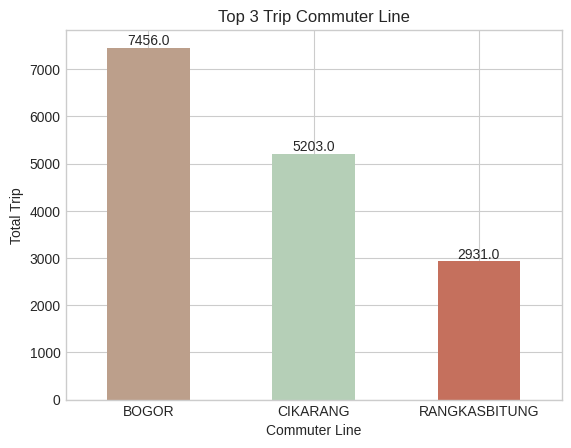

In [10]:
sample = lito.sort_values("Total Trip", ascending=False).iloc[:3, 0]

barplot(sample, title="Top 3 Trip Commuter Line", ylabel="Total Trip", color=colors, xlabel="Commuter Line")

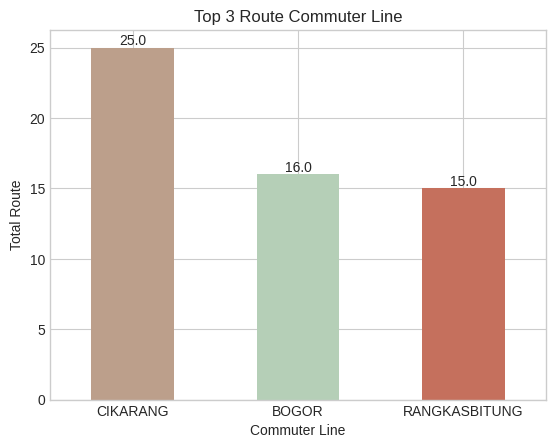

In [11]:
i = "Total Route"

sample = lito.sort_values(i, ascending=False).iloc[:3, 1]

barplot(sample, title="Top 3 Route Commuter Line", ylabel=i, color=colors, xlabel="Commuter Line")

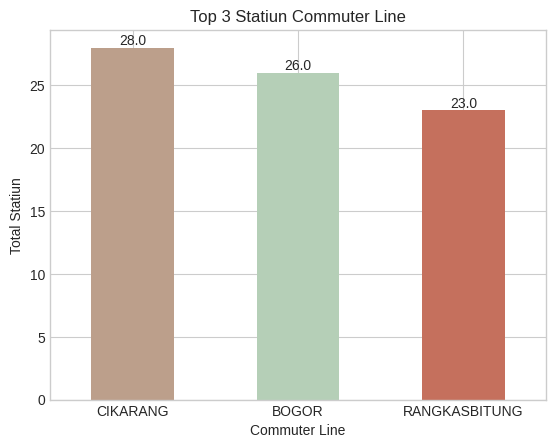

In [12]:
i = "Total Statiun"

sample = lito.sort_values(i, ascending=False).iloc[:3, 2]

barplot(sample, title="Top 3 Statiun Commuter Line", ylabel=i, color=colors, xlabel="Commuter Line")